In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_palette("magma_r")

In [2]:
df = pd.read_csv('data/test.csv')
df1 = pd.read_csv('data/train.csv')

In [3]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# inplace = True (overwrting the existing dataframe)
df1.set_index('PassengerId', inplace=True)
df1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df1.shape

(891, 11)

In [6]:
df1.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [7]:
df1.count()

Survived    891
Pclass      891
Name        891
Sex         891
Age         714
SibSp       891
Parch       891
Ticket      891
Fare        891
Cabin       204
Embarked    889
dtype: int64

In [8]:
df1.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [9]:
df1.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df1.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


## Replacing Null Values

In [12]:
# replacing null values
median_age = df1['Age'].median()
df1['Age'].fillna(value = median_age, inplace = True)

In [13]:
df1['Cabin'].value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
D              3
F2             3
              ..
B78            1
A14            1
C128           1
D6             1
B4             1
Name: Cabin, Length: 147, dtype: int64

In [14]:
cabmost = df1['Cabin'].value_counts()[:5].index.tolist()
print(cabmost)
df1['Cabin'].fillna(value = 'U', inplace = True)

['C23 C25 C27', 'G6', 'B96 B98', 'D', 'F2']


In [15]:
df1['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [16]:
df1['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [17]:
df1.fillna(value = 'S', inplace = True)

In [18]:
df1.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

## Feature Engineering

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [20]:
df1.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [21]:
df1.select_dtypes(include = np.number)

,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,0,3,22.0,1,0,7.2500
2,1,1,38.0,1,0,71.2833
3,1,3,26.0,0,0,7.9250
4,1,1,35.0,1,0,53.1000
5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
887,0,2,27.0,0,0,13.0000
888,1,1,19.0,0,0,30.0000
889,0,3,28.0,1,2,23.4500


In [22]:
df1.select_dtypes(include = np.object)

,Name,Sex,Ticket,Cabin,Embarked
PassengerId,,,,,
1,"Braund, Mr. Owen Harris",male,A/5 21171,U,S
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
3,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U,S
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
5,"Allen, Mr. William Henry",male,373450,U,S
...,...,...,...,...,...
887,"Montvila, Rev. Juozas",male,211536,U,S
888,"Graham, Miss. Margaret Edith",female,112053,B42,S
889,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,U,S


In [23]:
df1['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [24]:
df1['Sex'].replace(['male','female'], [0,1], inplace = True)
df1['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    int64  
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.5+ KB


In [26]:
df1['Cabin'].unique()

array(['U', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [27]:
cabin_list = df1['Cabin'].tolist()
print(cabin_list)

['U', 'C85', 'U', 'C123', 'U', 'U', 'E46', 'U', 'U', 'U', 'G6', 'C103', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'D56', 'U', 'A6', 'U', 'U', 'U', 'C23 C25 C27', 'U', 'U', 'U', 'B78', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'D33', 'U', 'B30', 'C52', 'U', 'U', 'U', 'U', 'U', 'B28', 'C83', 'U', 'U', 'U', 'F33', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'F G73', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'C23 C25 C27', 'U', 'U', 'U', 'E31', 'U', 'U', 'U', 'A5', 'D10 D12', 'U', 'U', 'U', 'U', 'D26', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'C110', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'B58 B60', 'U', 'U', 'U', 'U', 'E101', 'D26', 'U', 'U', 'U', 'F E69', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'D47', 'C123', 'U', 'B86', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'F2', 'U', 'U', 'C2', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'E33', 'U', 'U', 'U', 'B19', 'U', 'U', 'U', 'A7', 'U', 'U', 'C49', 'U', 'U', 'U

In [28]:
for i in range(len(cabin_list)):
    cabin_list[i] = cabin_list[i][0]
print(cabin_list)    

['U', 'C', 'U', 'C', 'U', 'U', 'E', 'U', 'U', 'U', 'G', 'C', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'D', 'U', 'A', 'U', 'U', 'U', 'C', 'U', 'U', 'U', 'B', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'D', 'U', 'B', 'C', 'U', 'U', 'U', 'U', 'U', 'B', 'C', 'U', 'U', 'U', 'F', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'F', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'C', 'U', 'U', 'U', 'E', 'U', 'U', 'U', 'A', 'D', 'U', 'U', 'U', 'U', 'D', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'C', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'B', 'U', 'U', 'U', 'U', 'E', 'D', 'U', 'U', 'U', 'F', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'D', 'C', 'U', 'B', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'F', 'U', 'U', 'C', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'E', 'U', 'U', 'U', 'B', 'U', 'U', 'U', 'A', 'U', 'U', 'C', 'U', 'U', 'U', 'U', 'U', 'F', 'U', 'A', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'F', 'B', 'B', 'U', 'U', 'U', 'U',

In [29]:
df1['Cabin_unique'] = cabin_list
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Pclass        891 non-null    int64  
 2   Name          891 non-null    object 
 3   Sex           891 non-null    int64  
 4   Age           891 non-null    float64
 5   SibSp         891 non-null    int64  
 6   Parch         891 non-null    int64  
 7   Ticket        891 non-null    object 
 8   Fare          891 non-null    float64
 9   Cabin         891 non-null    object 
 10  Embarked      891 non-null    object 
 11  Cabin_unique  891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [30]:
df1['Cabin_unique'].unique()

array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [31]:
df1['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [32]:
df1['Embarked'].replace(['S', 'C', 'Q'], [1, 2, 3], inplace = True)
df1['Embarked'].value_counts()

1    646
2    168
3     77
Name: Embarked, dtype: int64

In [33]:
df1['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [34]:
age_group = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0}
print(age_group)

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0}


In [35]:
age_group[4] = 16
print(age_group)

{0: 0, 1: 0, 2: 0, 3: 0, 4: 16, 5: 0, 6: 0, 7: 0, 8: 0}


In [36]:
for age in df1['Age']:
    age_group[int(age / 10)] += 1
print(age_group)

{0: 62, 1: 102, 2: 397, 3: 167, 4: 105, 5: 48, 6: 19, 7: 6, 8: 1}


In [37]:
df1['new_age'] = df1['Age'].apply(lambda x : int(x/10))
df1['new_age'].unique()

array([2, 3, 5, 0, 1, 4, 6, 7, 8], dtype=int64)

In [38]:
df1.select_dtypes(include = np.number)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,new_age
PassengerId,,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,1,2
2,1,1,1,38.0,1,0,71.2833,2,3
3,1,3,1,26.0,0,0,7.9250,1,2
4,1,1,1,35.0,1,0,53.1000,1,3
5,0,3,0,35.0,0,0,8.0500,1,3
...,...,...,...,...,...,...,...,...,...
887,0,2,0,27.0,0,0,13.0000,1,2
888,1,1,1,19.0,0,0,30.0000,1,1
889,0,3,1,28.0,1,2,23.4500,1,2


In [39]:
df1.select_dtypes(include = np.object)

,Name,Ticket,Cabin,Cabin_unique
PassengerId,,,,
1,"Braund, Mr. Owen Harris",A/5 21171,U,U
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,C85,C
3,"Heikkinen, Miss. Laina",STON/O2. 3101282,U,U
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803,C123,C
5,"Allen, Mr. William Henry",373450,U,U
...,...,...,...,...
887,"Montvila, Rev. Juozas",211536,U,U
888,"Graham, Miss. Margaret Edith",112053,B42,B
889,"Johnston, Miss. Catherine Helen ""Carrie""",W./C. 6607,U,U


In [40]:
df1.shape

(891, 13)

In [41]:
df.shape

(418, 11)

<AxesSubplot:xlabel='Age'>

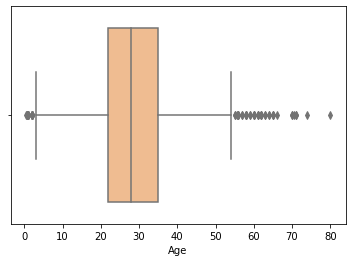

In [42]:
sns.boxplot(x = df1['Age'])

<AxesSubplot:xlabel='Fare'>

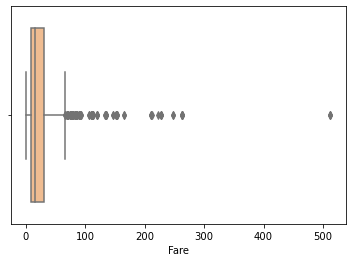

In [43]:
sns.boxplot(x = df1['Fare'])

## EDA

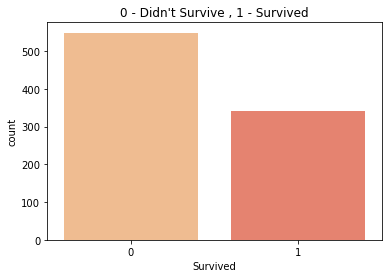

In [44]:
sns.countplot(x ="Survived", data = df1)
plt.title("0 - Didn't Survive , 1 - Survived")
plt.show()

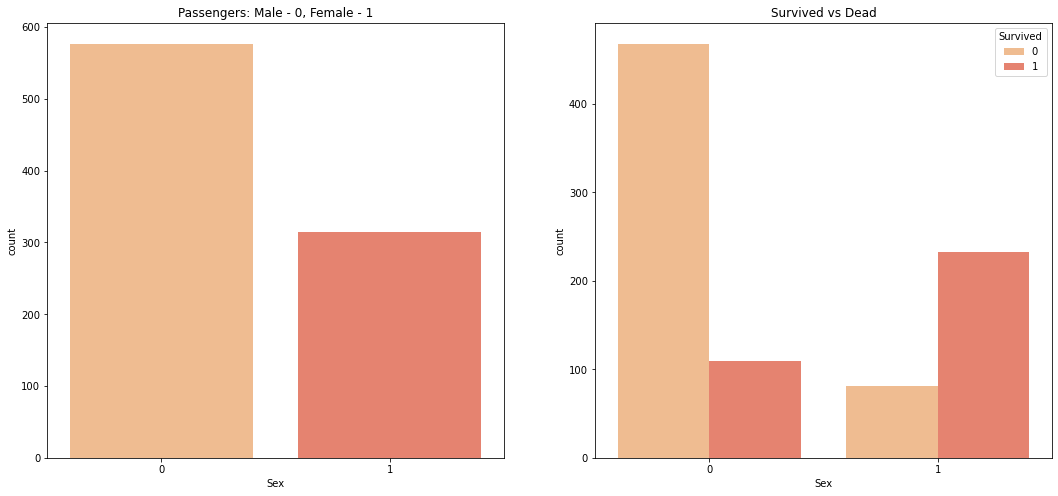

In [45]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
sns.countplot(x = "Sex", data = df1, ax = ax[0])
ax[0].set_title("Passengers: Male - 0, Female - 1")
sns.countplot(x = "Sex", hue = "Survived", data = df1, ax = ax[1])
ax[1].set_title("Survived vs Dead")
plt.show()

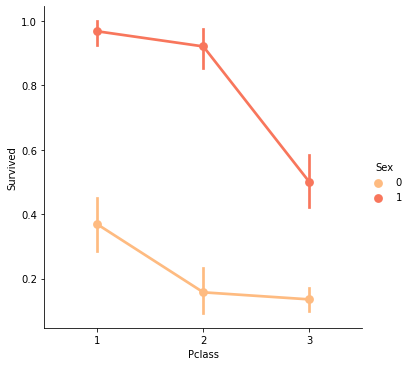

In [46]:
sns.catplot(x = "Pclass", y = "Survived", hue = "Sex", data = df1, kind = "point")
plt.show()

In [47]:
pd.crosstab([df1["Sex"], df1["Survived"]], df1["Pclass"], margins = True).style.background_gradient(cmap = "magma_r")

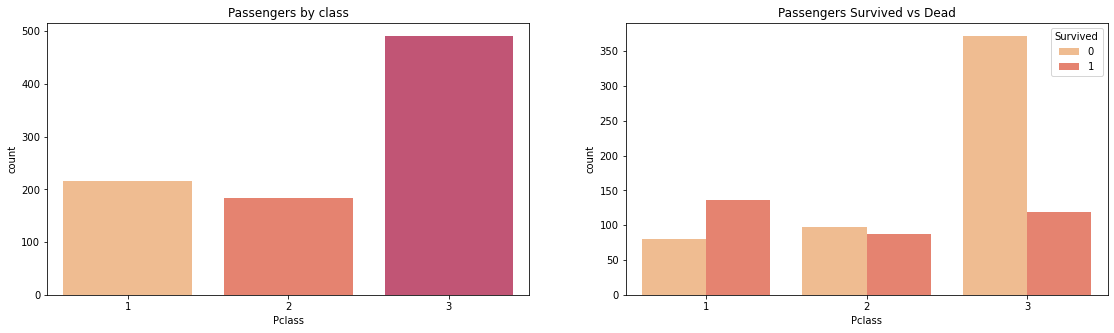

In [48]:
fig, ax = plt.subplots(1, 2, figsize = (19, 5))
sns.countplot(x = "Pclass", data = df1, ax = ax[0])
ax[0].set_title("Passengers by class")
sns.countplot(x = "Pclass", hue = "Survived", data = df1, ax = ax[1])
ax[1].set_title("Passengers Survived vs Dead")
plt.show()

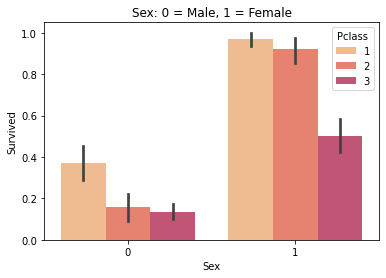

In [49]:
sns.barplot(x = "Sex", y = "Survived", hue = "Pclass", data = df1)
plt.title("Sex: 0 = Male, 1 = Female")
plt.show()

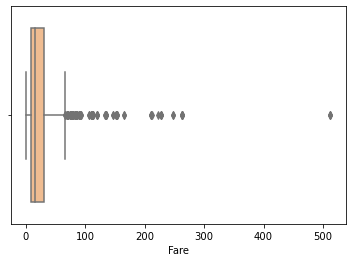

In [50]:
sns.boxplot(x = df1["Fare"])
plt.show()

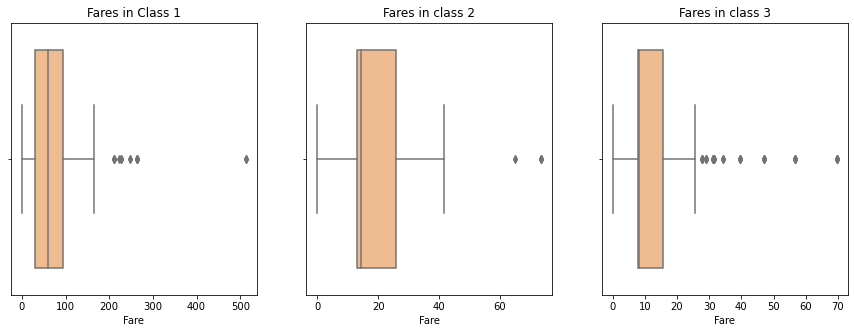

In [51]:
fig, ax = plt.subplots(1, 3, figsize = (15, 5))
sns.boxplot(x = df1[df1["Pclass"] == 1]["Fare"], ax = ax[0])
ax[0].set_title("Fares in Class 1")
sns.boxplot(x = df1[df1["Pclass"] == 2]["Fare"], ax = ax[1])
ax[1].set_title("Fares in class 2")
sns.boxplot(x = df1[df1["Pclass"] == 3]["Fare"], ax = ax[2])
ax[2].set_title("Fares in class 3")
plt.show()

In [52]:
pd.crosstab([df1["Embarked"], df1["Survived"]], df1["Pclass"], margins = True).style.background_gradient(cmap = "magma_r")